# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/lavat/Documents/TheForage/BristishAirways/data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
# data sumamry on NUMERIC features
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.shape

(50000, 14)

List columns in df

In [9]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

Count number of records in a specified column

In [10]:
print(f'Number of passengers entries: {df.num_passengers.count()}')

Number of passengers entries: 50000


Show number of unique values in each column

In [11]:
print(f'Unique num_passengers: {df.num_passengers.nunique()}')
print(f'Unique sales_channel: {df.sales_channel.nunique()}')
print(f'Unique trip_type: {df.trip_type.nunique()}')
print(f'Unique purchase_lead: {df.purchase_lead.nunique()}')
print(f'Unique length_of_stay: {df.length_of_stay.nunique()}')
print(f'Unique flight_hour: {df.flight_hour.nunique()}')
print(f'Unique flight_day: {df.flight_day.nunique()}')
print(f'Unique route: {df.route.nunique()}')
print(f'Unique booking_origin: {df.booking_origin.nunique()}')
print(f'Unique wants_extra_baggage: {df.wants_extra_baggage.nunique()}')
print(f'Unique wants_preferred_seat: {df.wants_preferred_seat.nunique()}')
print(f'Unique wants_in_flight_meals: {df.wants_in_flight_meals.nunique()}')
print(f'Unique flight_duration: {df.flight_duration.nunique()}')
print(f'Unique booking_complete: {df.booking_complete.nunique()}')

# the value two shows a column can be represented with binary classification

Unique num_passengers: 9
Unique sales_channel: 2
Unique trip_type: 3
Unique purchase_lead: 470
Unique length_of_stay: 335
Unique flight_hour: 24
Unique flight_day: 7
Unique route: 799
Unique booking_origin: 104
Unique wants_extra_baggage: 2
Unique wants_preferred_seat: 2
Unique wants_in_flight_meals: 2
Unique flight_duration: 21
Unique booking_complete: 2


In [12]:
# Sum of null values in each column
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### GOAL:
###### With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power. When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking



In [13]:
import scipy as sc

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style sheet for plot
plt.style.use('ggplot')

#expand number of columns when displaying df use this only if all columns don't (usually when there's a lot of columns so pandas shows the middle with '...')
# pd.set_option('max_columns' , 200)

In [15]:
# verify if any entry is duplicated
# df.duplicated()

In [16]:
# verifiy if any entry is duplicated in a column subset
# df.loc[df.duplicated(subset=['num_passengers'])]

In [17]:
# query data for analysis
# df.query('num_passengers == 2')

In [18]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


Feature Understanding (univariate analysis): 
<br>
    Plotting Feature distribution 
<br>
        -Historgram 
<br>
        -KDE 
<br>
        -Boxplot
        <br>
        -Bar graphs

In [19]:
# Count frequency of a unique value occuring in specified column
df['num_passengers'].value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

Text(0, 0.5, 'Count')

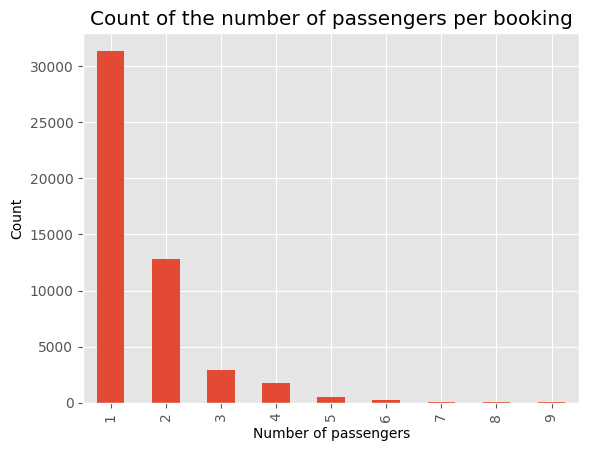

In [20]:
# bar plot
ax = df['num_passengers'].value_counts() \
    .plot(kind='bar', title='Count of the number of passengers per booking')

ax.set_xlabel('Number of passengers')
ax.set_ylabel('Count')

We can see majority of bookings were for solo riders or couples

In [21]:
# Sales channel distribution
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

Text(0, 0.5, 'Count')

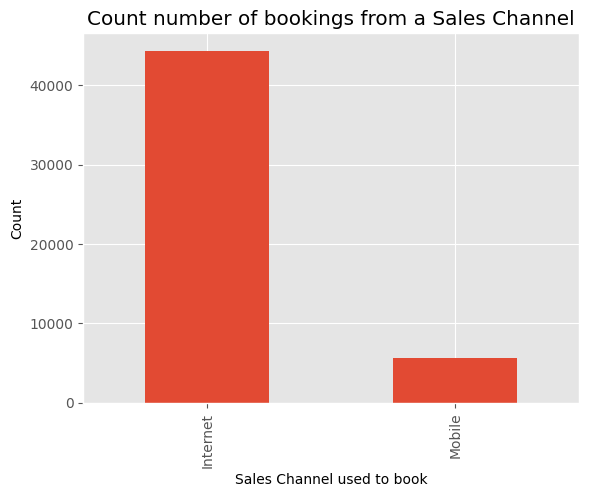

In [22]:
# bar plot
ax = df['sales_channel'].value_counts() \
    .plot(kind='bar', title='Count number of bookings from a Sales Channel')

ax.set_xlabel('Sales Channel used to book')
ax.set_ylabel('Count')

we can see majority of people booked by the internet

In [23]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

Text(0, 0.5, 'Count')

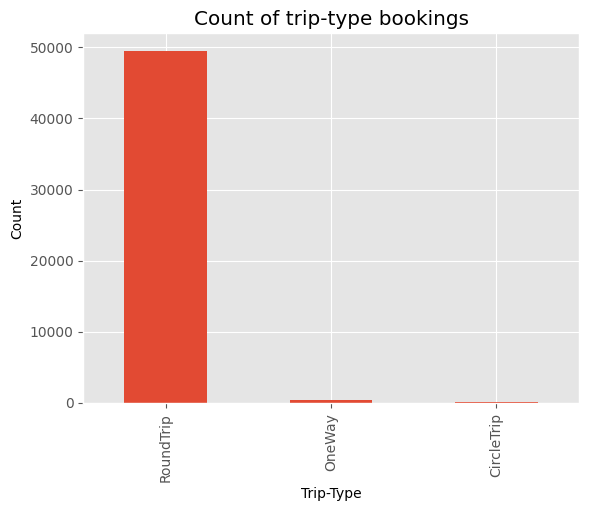

In [24]:
# bar plot
ax2 = df['trip_type'].value_counts() \
    .plot(kind='bar', title='Count of trip-type bookings')

ax2.set_xlabel('Trip-Type')
ax2.set_ylabel('Count')

We can see majority bookings were roundtrip bookings

In [25]:
df['flight_day'].value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

Text(0, 0.5, 'Count')

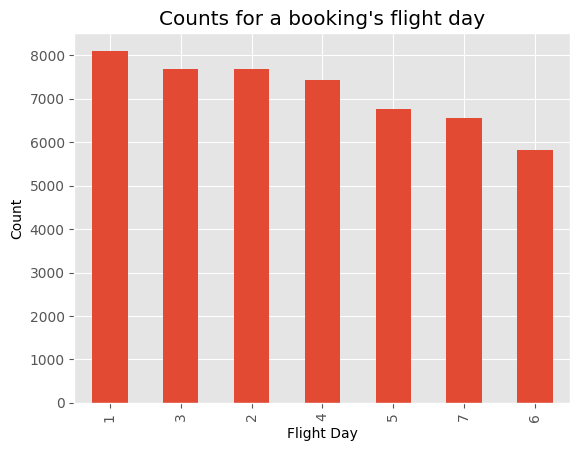

In [26]:
ax3 = df['flight_day'].value_counts() \
    .plot(kind='bar', title="Counts for a booking's flight day")
          
ax3.set_xlabel('Flight Day')
ax3.set_ylabel('Count')

We can see there is less flights for Saturdays

In [27]:
df['wants_extra_baggage'].value_counts()

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

Text(0, 0.5, 'Count')

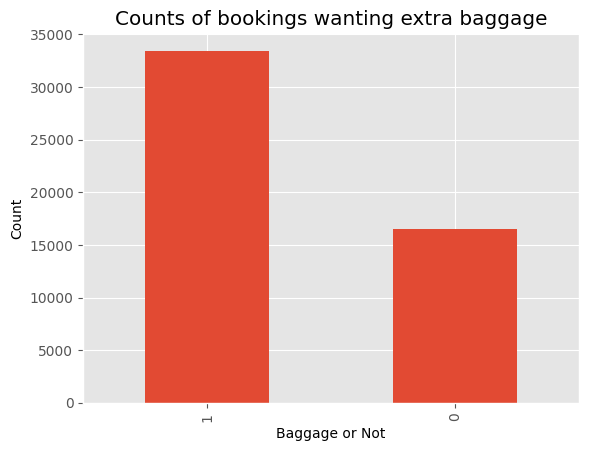

In [28]:
ax4 = df['wants_extra_baggage'].value_counts() \
    .plot(kind='bar', title='Counts of bookings wanting extra baggage')

ax4.set_xlabel('Baggage or Not')
ax4.set_ylabel('Count')

Majority of bookings wanted extra baggage

In [29]:
df['wants_preferred_seat'].value_counts()

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

Text(0, 0.5, 'Count')

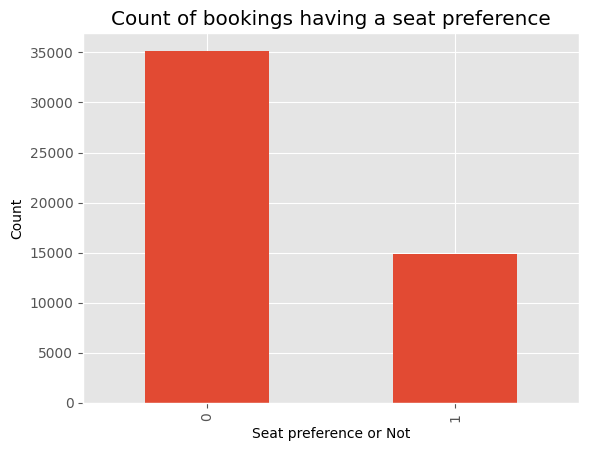

In [30]:
ax5 = df['wants_preferred_seat'].value_counts() \
    .plot(kind='bar', title='Count of bookings having a seat preference')

ax5.set_xlabel('Seat preference or Not')
ax5.set_ylabel('Count')

Not as many bookings had a seat preference 

In [31]:
df['wants_in_flight_meals'].value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

Text(0, 0.5, 'Count')

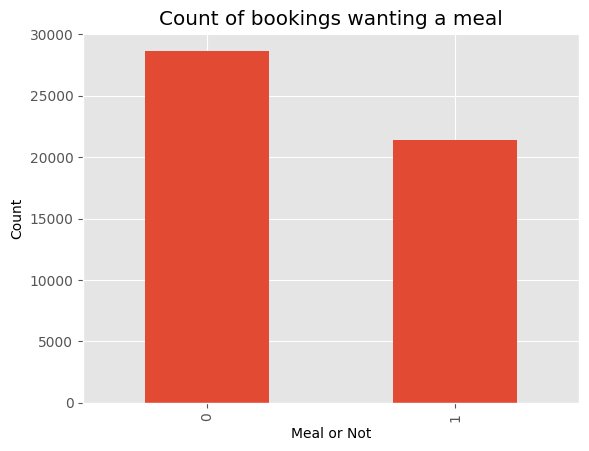

In [32]:
ax6 = df['wants_in_flight_meals'].value_counts() \
    .plot(kind='bar', title='Count of bookings wanting a meal')

ax6.set_xlabel('Meal or Not')
ax6.set_ylabel('Count')

About 42% wanted meals

In [33]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Text(0, 0.5, 'Count')

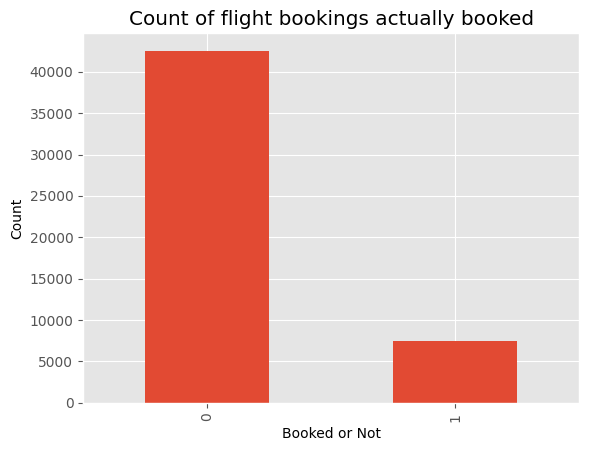

In [34]:
ax7 = df['booking_complete'].value_counts() \
    .plot(kind='bar', title='Count of flight bookings actually booked')

ax7.set_xlabel('Booked or Not')
ax7.set_ylabel('Count')

85% of consumers did NOT complete their flight booking

In [35]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

Text(0, 0.5, 'Count')

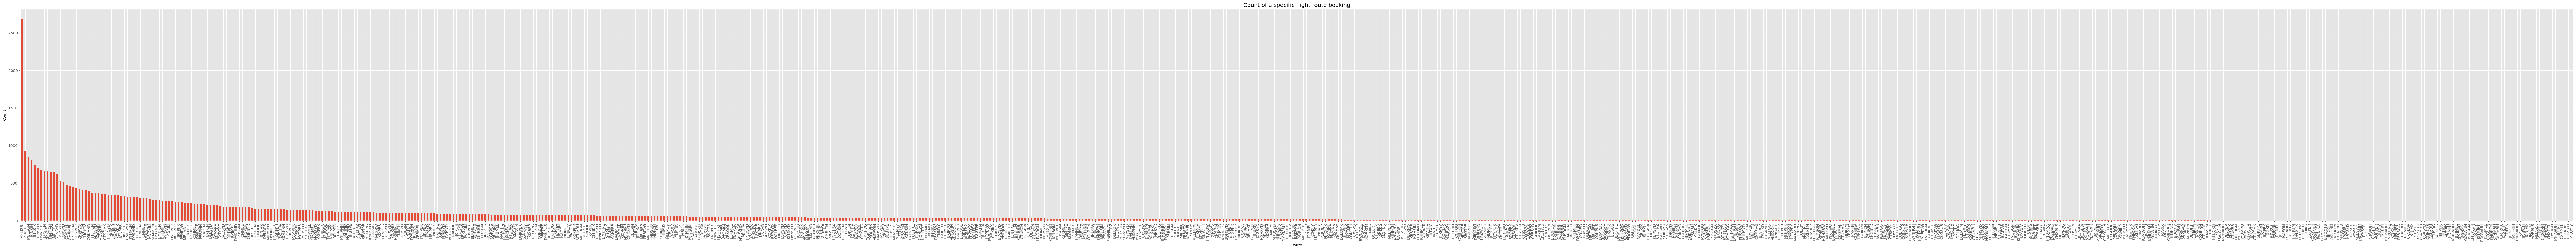

In [36]:
ax8 = df['route'].value_counts() \
    .plot(kind='bar', title='Count of a specific flight route booking', figsize=(120, 10))

ax8.set_xlabel('Route')
ax8.set_ylabel('Count')

Significant number of bookings route was AKL-->KUL

In [37]:
df['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

Text(0, 0.5, 'Count')

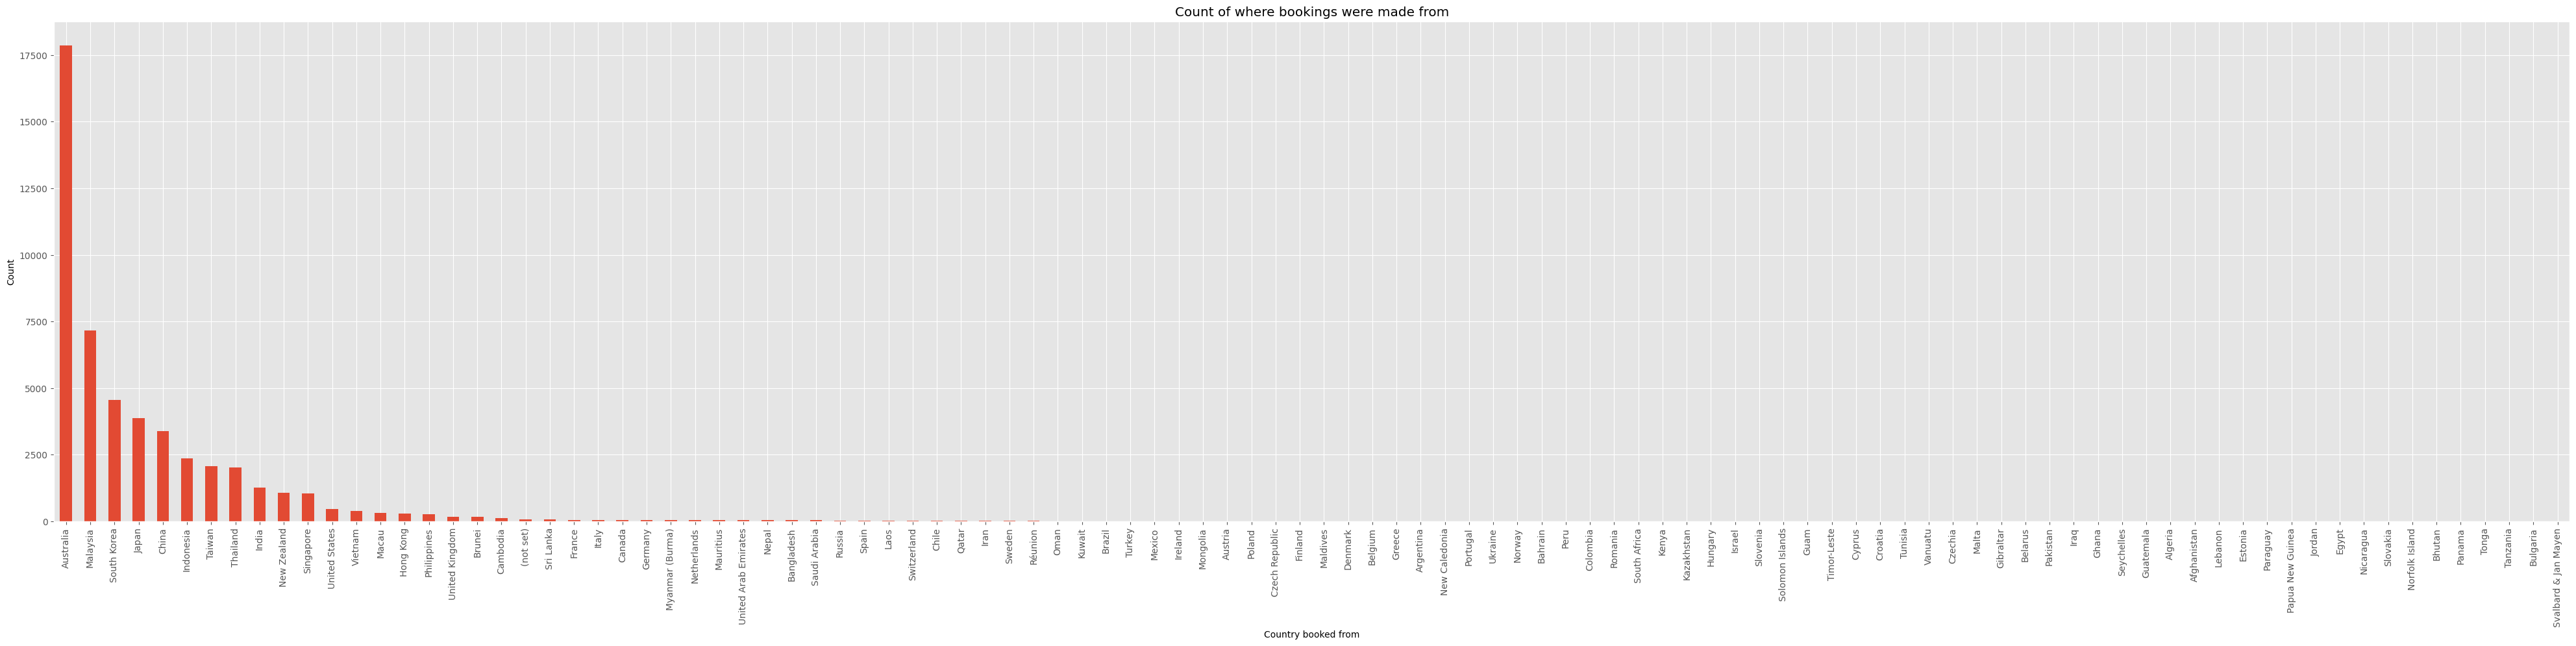

In [38]:
ax9 = df['booking_origin'].value_counts() \
    .plot(kind='bar', title='Count of where bookings were made from', figsize=(50, 10))

ax9.set_xlabel('Country booked from')
ax9.set_ylabel('Count')

Significant bookings originated from Australia

In [39]:
# distribution of purchase lead
df['purchase_lead'].value_counts()

1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: purchase_lead, Length: 470, dtype: int64

Text(0.5, 0, 'Number of days')

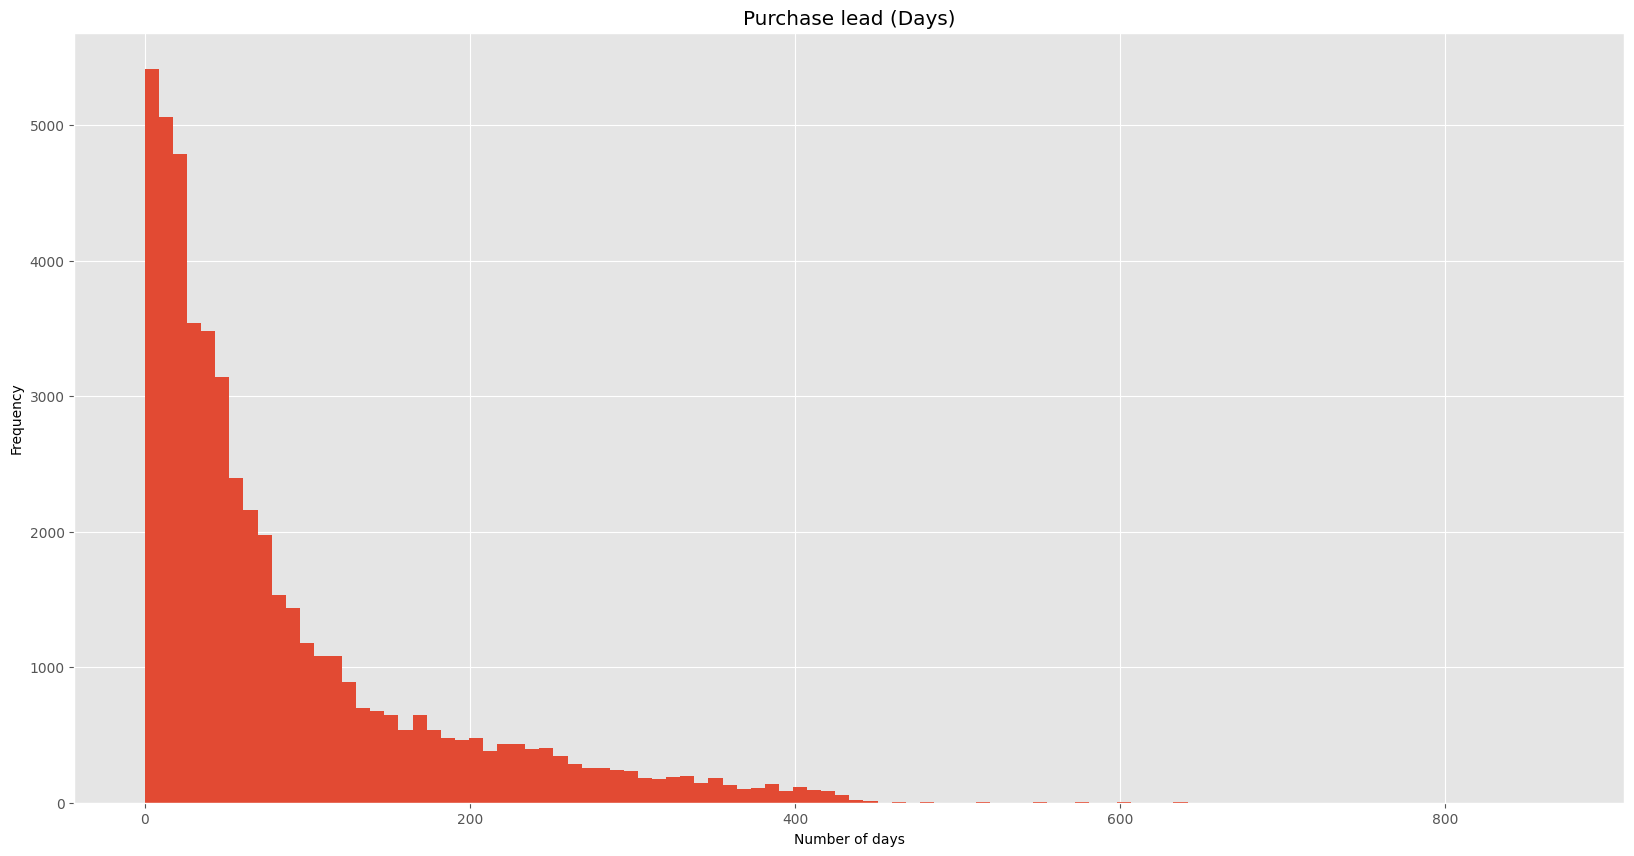

In [40]:
ax10 = df['purchase_lead'].plot(kind='hist',
                                bins=100,
                                title= 'Purchase lead (Days)',
                                figsize=(20,10))

ax10.set_xlabel('Number of days')

We can see a lot of bookings are planned fairly last minute, i.e. 10 days or less

In [41]:
# distribution of length of stay
df['length_of_stay'].value_counts()

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: length_of_stay, Length: 335, dtype: int64

Text(0.5, 0, 'Number of days')

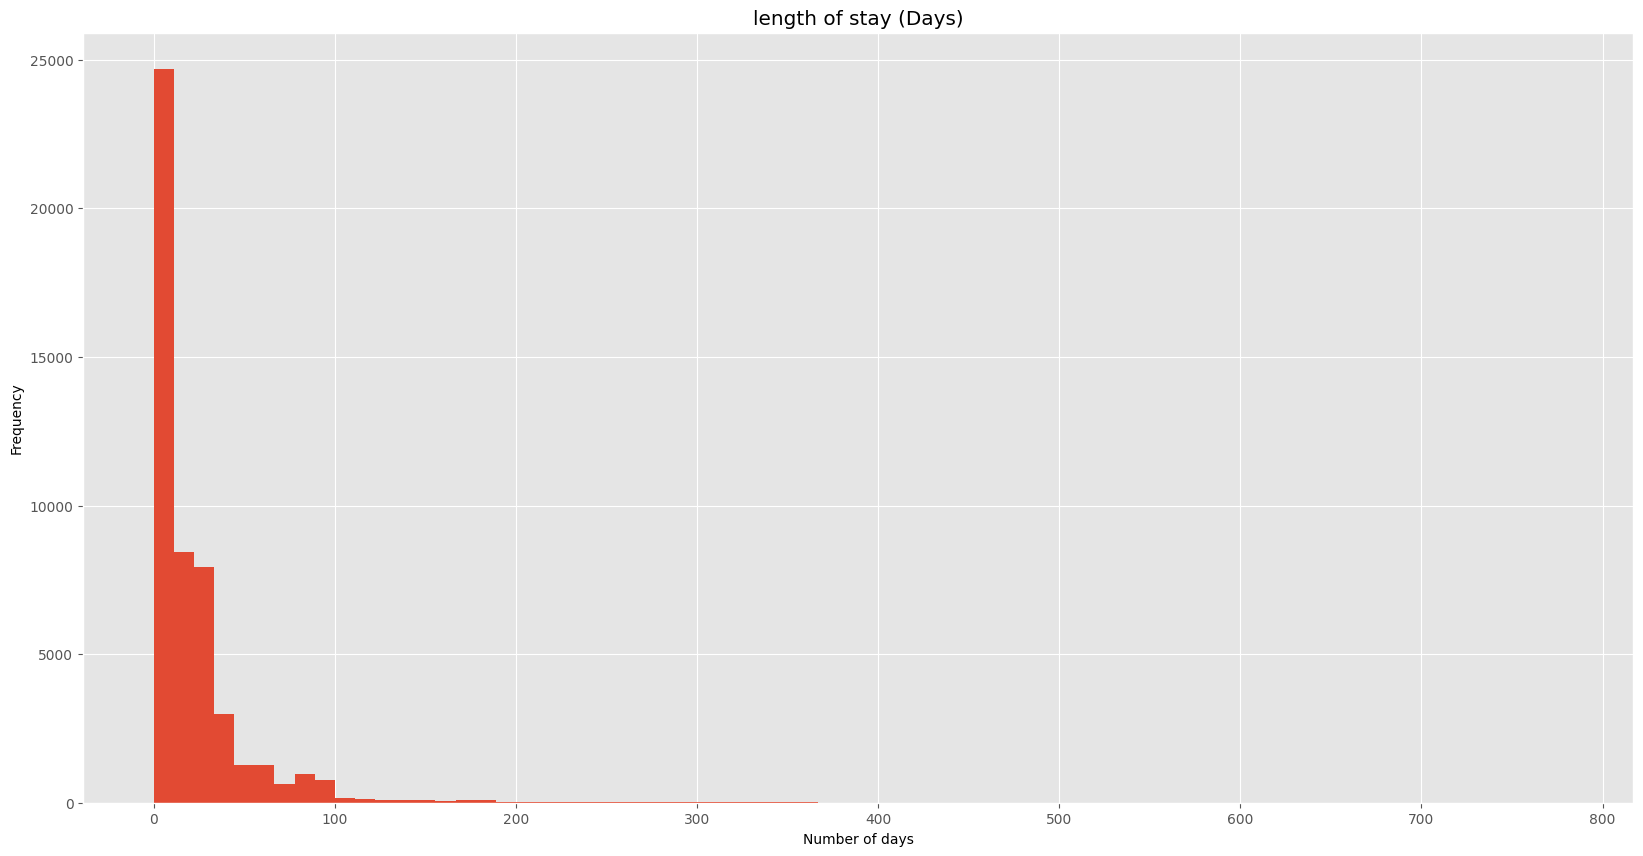

In [42]:
# distribution of length of stay
ax11 = df['length_of_stay'].plot(kind='hist',
                                bins=70,
                                title= 'length of stay (Days)',
                                figsize=(20,10))

ax11.set_xlabel('Number of days')

most booking length of stay were under 10 days

In [43]:
# distribution of flight hour
df['flight_hour'].value_counts()

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64

Text(0.5, 0, 'Hour')

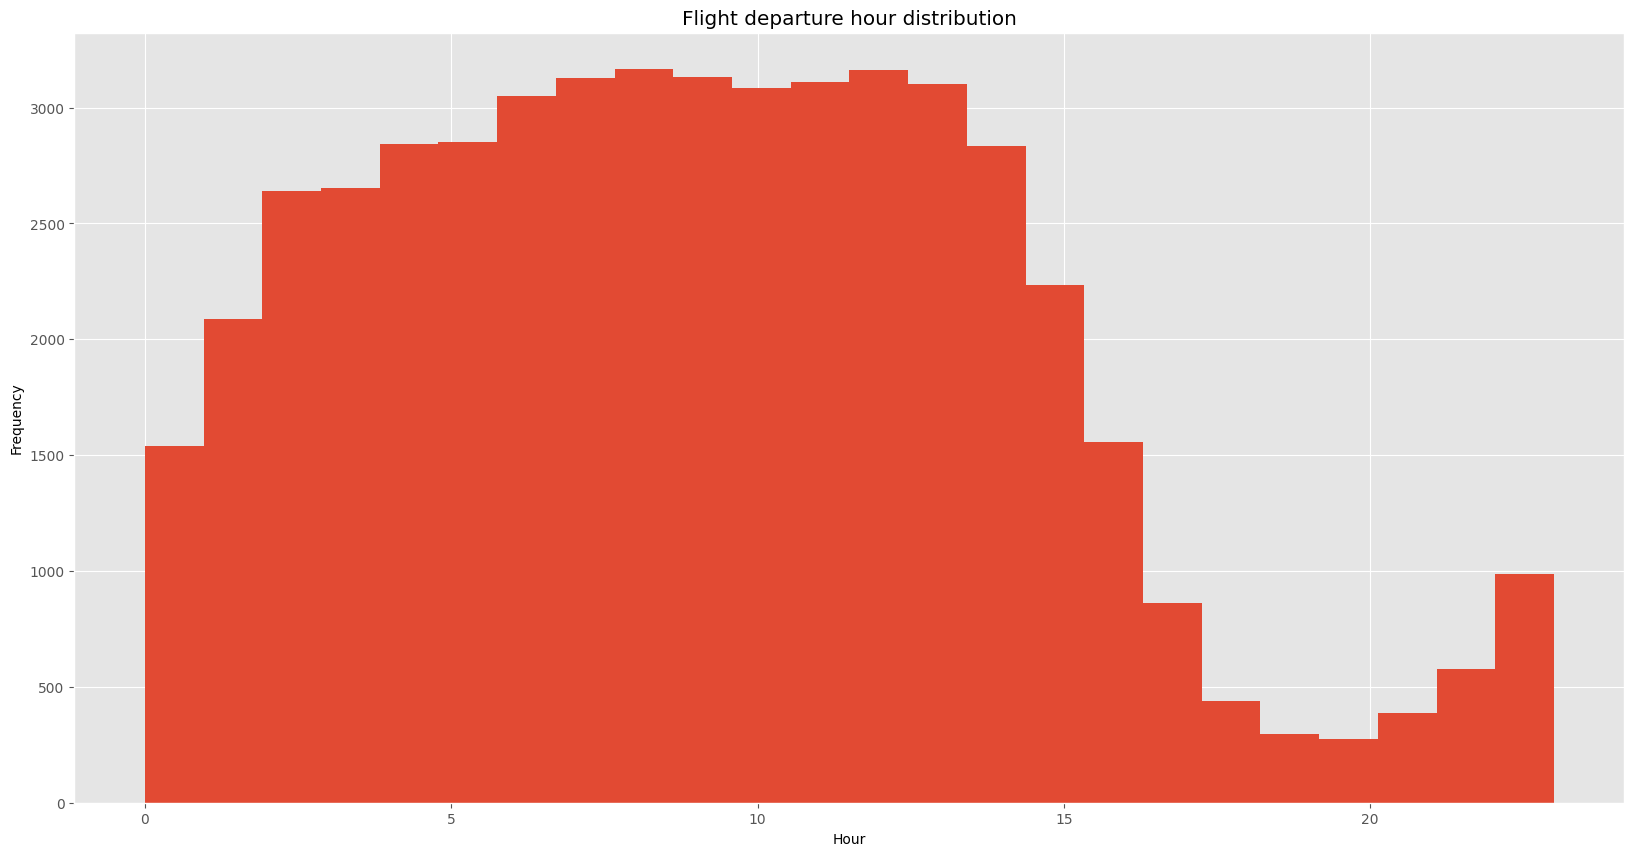

In [44]:
# distribution of flight hour
ax12 = df['flight_hour'].plot(kind='hist',
                                bins=24,
                                title= 'Flight departure hour distribution',
                                figsize=(20,10))

ax12.set_xlabel('Hour')

Most booking departure time were for the evening or night time

In [45]:
# distribution of flight duration
df['flight_duration'].value_counts()

8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: flight_duration, dtype: int64

In [46]:
len(df['flight_duration'].value_counts())

21

Text(0.5, 0, 'Hours')

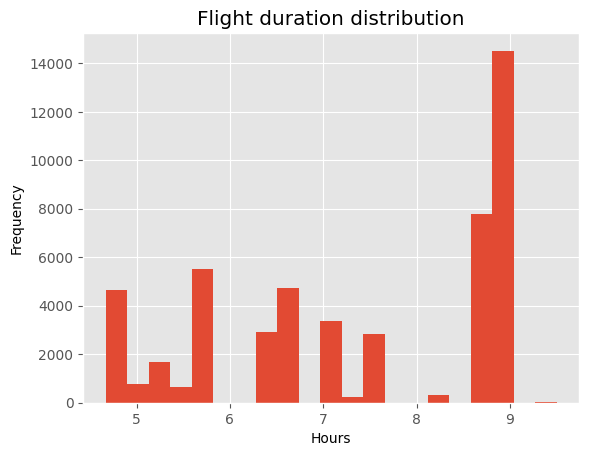

In [47]:
ax13 = df['flight_duration'].plot(kind='hist',
                                bins=21,
                                title= 'Flight duration distribution')

ax13.set_xlabel('Hours')

Most bookings were for a flight duration of just under 9 hrs

Feature relationship
<br>
- scatterplot
<br>
- Heatmap correlation
<br>
- pairplot
<br>
- groubpy comparisons

Different ways to go about comparing features

1. we can use pandas to make a scatter plot

In [48]:
# df.plot(kind='scatter',
#         x='num_passengers',
#         y='length_of_stay',
#         title='Number of passengers vs. Length of stay')
# plt.show()

2. With seaborn we can do more advanced things when making scatter plots. For example color the points according to a feature

In [49]:
# sns.set(rc={"figure.figsize":(10,10)})

# sns.scatterplot(x='num_passengers',
#                 y='length_of_stay',
#                 hue='booking_complete',
#                 alpha=0.7,
#                 data = df)

3. SeaBorn has a pairplot functionality that allows us to compare multiple features together in a matrix form. Note this can take time to run and works on numeric datasets NOT categorical

In [50]:
# sns.pairplot(df,
#              vars=['num_passengers','purchase_lead',
#        'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
#        'wants_in_flight_meals', 'flight_duration'],
#        hue='booking_complete')

# plt.show()

Observations from numeric pair plotting:
<br> 
- num_passengers vs. purchase lead: more actual booked flights purchase lead days ranged from 200-300 days if the number of passengers were 3,4 or 9 people. If 5 passengers, the purchase lead days ranged between 150-250 days or 350 to 450 days. And for 6 passengers, the purchase lead ranged from 50 to 150 days.
<br>
- Num_passengers vs. length_of_stay: As number of passengers increased, length of stay were likely lower
<br>
- Likelyhood of passengers wanting extra baggage, food and a preferred seat increased when number of passenger is 6 or more and the purchase lead is more than approx 250 days 

In [51]:
# sns.set(rc={"figure.figsize":(10,10)})

# sns.scatterplot(x='num_passengers',
#                 y='sales_channel',
#                 hue='booking_complete',
#                 alpha=0.5,
#                 data = df)

When the booking is done over a mobile it is more likely for a couple. Else for passengers of 3-6 and 8-9 it is likely done over the internet.

See correlation values between numeric features

In [52]:
df_corr = df[['num_passengers', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete']].corr()
df_corr

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


No features have quite a strong correlation with one another per say. 
However, we can see though little, there is some positive weak (> 0.20) correlation between the number of passengers and purchase lead, having a seat preference and extra baggage, extra baggage and flight meals, flight meals and seat preference strongest (>0.30).

There are two pair features that seem to have some negative weak correlation, ~0.10, number of passengers and length of stay as well as complete booking and flight duration.

<Axes: >

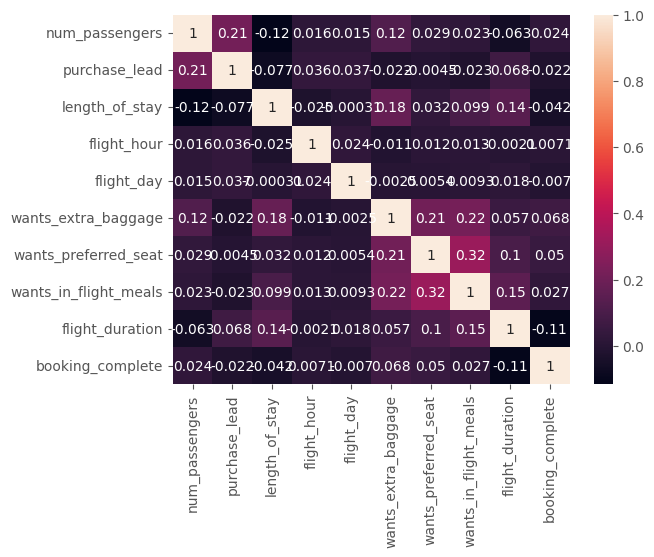

In [53]:
# Visualize correlation in a heat map
sns.heatmap(df_corr, annot=True)

We can see no feature strongly correlates

Random Forest Model training

In [54]:
# Turn categorical values to dummy values
for col in df.dtypes[df.dtypes == 'object'].index:
    for_dummy = df.pop(col)
    df = pd.concat([df, pd.get_dummies(for_dummy, prefix=col)], axis=1)

df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# save target column into a variable
Y = df.pop('booking_complete')

In [56]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,6,1,0,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,1,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
import sklearn 
from sklearn.datasets import load_iris
from sklearn import tree

In [58]:
# create random forest object
from sklearn.ensemble import RandomForestClassifier

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
# create test/train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=0.20)

In [61]:
# Define hyperparameters for the model
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop = 80, num = 10)]

# Number of features to consider at every split, 'auto' will deprecate
max_features = ['sqrt']

# Maximum number of levels in tree
max_depth = [2, 4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]

# Method of selecting samples or training each tree
bootstrap = [True, False]

In [62]:
# Create dictionary with hyperparameters
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap} 

print(param_grid)


{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [63]:
rf_Model = RandomForestClassifier()

Try randomizedSearchCV as its best for larger datasets, difference is the param_distributions hyperparameter

In [64]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs =4)

In [65]:
rf_RandomGrid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [66]:
# see best hyperparameters
rf_RandomGrid.best_params_

{'n_estimators': 25,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

Check model Accuracy

In [77]:
print("Train accuracy: ", rf_RandomGrid.score(x_train, y_train))
print("Test accuracy: ", rf_RandomGrid.score(x_test, y_test))

Train accuracy:  0.850775
Test accuracy:  0.8491


In [68]:
# Save fitted RandomGrid Model
best_clf = rf_RandomGrid.best_estimator_


Visualize the decision tree for the model

Issue I encountered here was that estimator_ attribute did not exist for the randomforestclassifier object. The reasoning is that the attribute does not exist for an unfit model. When fitting the model, it is done on a clone so we must save the clone fitted model in another variable and then the attribute will exist for the cloned model.

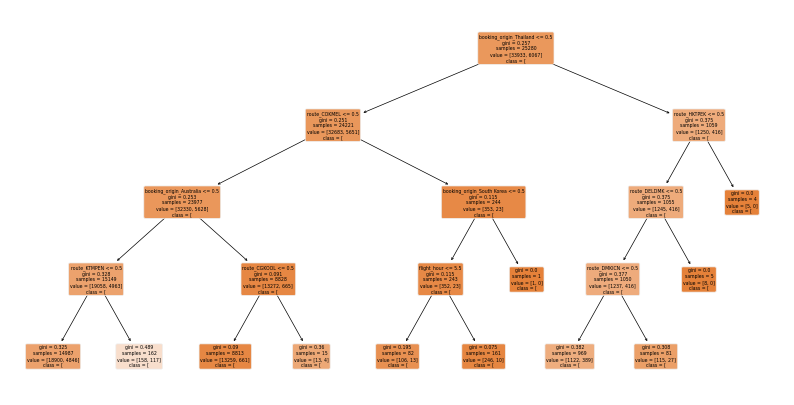

In [79]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 5))
plot_tree(best_clf.estimators_[2],
          feature_names = df.columns,
          class_names = str(Y.unique()),
          filled=True, rounded=True)


plt.show()

Feature importance : seeing how much a feature is contributing to the decision tree

In [96]:
feat_import = best_clf.feature_importances_

In [107]:
# save features name and importances as dataframe
importances_df = pd.DataFrame({'Feature_names':df.columns, 'Importances': feat_import})
importances_df.sort_values(by=['Importances'], ascending=False, inplace=True)
pd.set_option('display.max_rows', None)
top_24_import_feat = importances_df.head(24)
top_24_import_feat

,Feature_names,Importances
2,length_of_stay,0.125979
8,flight_duration,0.109171
864,booking_origin_Malaysia,0.103202
817,booking_origin_Australia,0.071020
5,wants_extra_baggage,0.057965
731,route_PENTPE,0.056579
906,booking_origin_Thailand,0.039744
492,route_JHBTPE,0.025894
56,route_BKIICN,0.022825
590,route_KTMPEN,0.022229


Text(0.5, 1.0, 'Top 24 importance features influecing the model prediction')

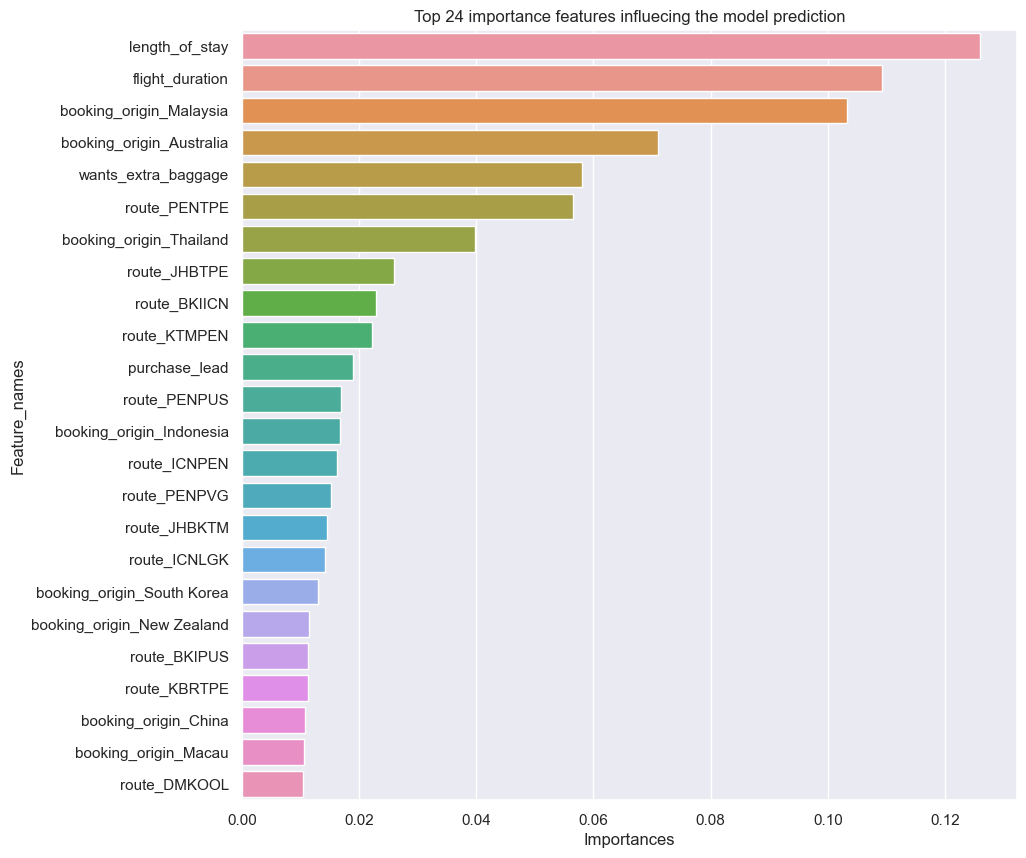

In [128]:
sns.set(rc={"figure.figsize":(10,10)})

sns.barplot(data=top_24_import_feat, 
            x= 'Importances',
             y='Feature_names',
             errorbar='sd').set_title('Top 24 importance features influecing the model prediction')

Analyze which features do not contribute to the decision tree and drop them

In [113]:
importances_df = importances_df[importances_df.Importances > 0.0]

In [117]:
pd.set_option('display.max_rows', None)
importances_df

,Feature_names,Importances
2,length_of_stay,1.259793e-01
8,flight_duration,1.091708e-01
864,booking_origin_Malaysia,1.032018e-01
817,booking_origin_Australia,7.102016e-02
5,wants_extra_baggage,5.796474e-02
731,route_PENTPE,5.657937e-02
906,booking_origin_Thailand,3.974377e-02
492,route_JHBTPE,2.589444e-02
56,route_BKIICN,2.282494e-02
590,route_KTMPEN,2.222894e-02


In [118]:
importances_df.shape

(122, 2)

Visualize all features that did have an influence of the decision

<Axes: xlabel='Importances', ylabel='Feature_names'>

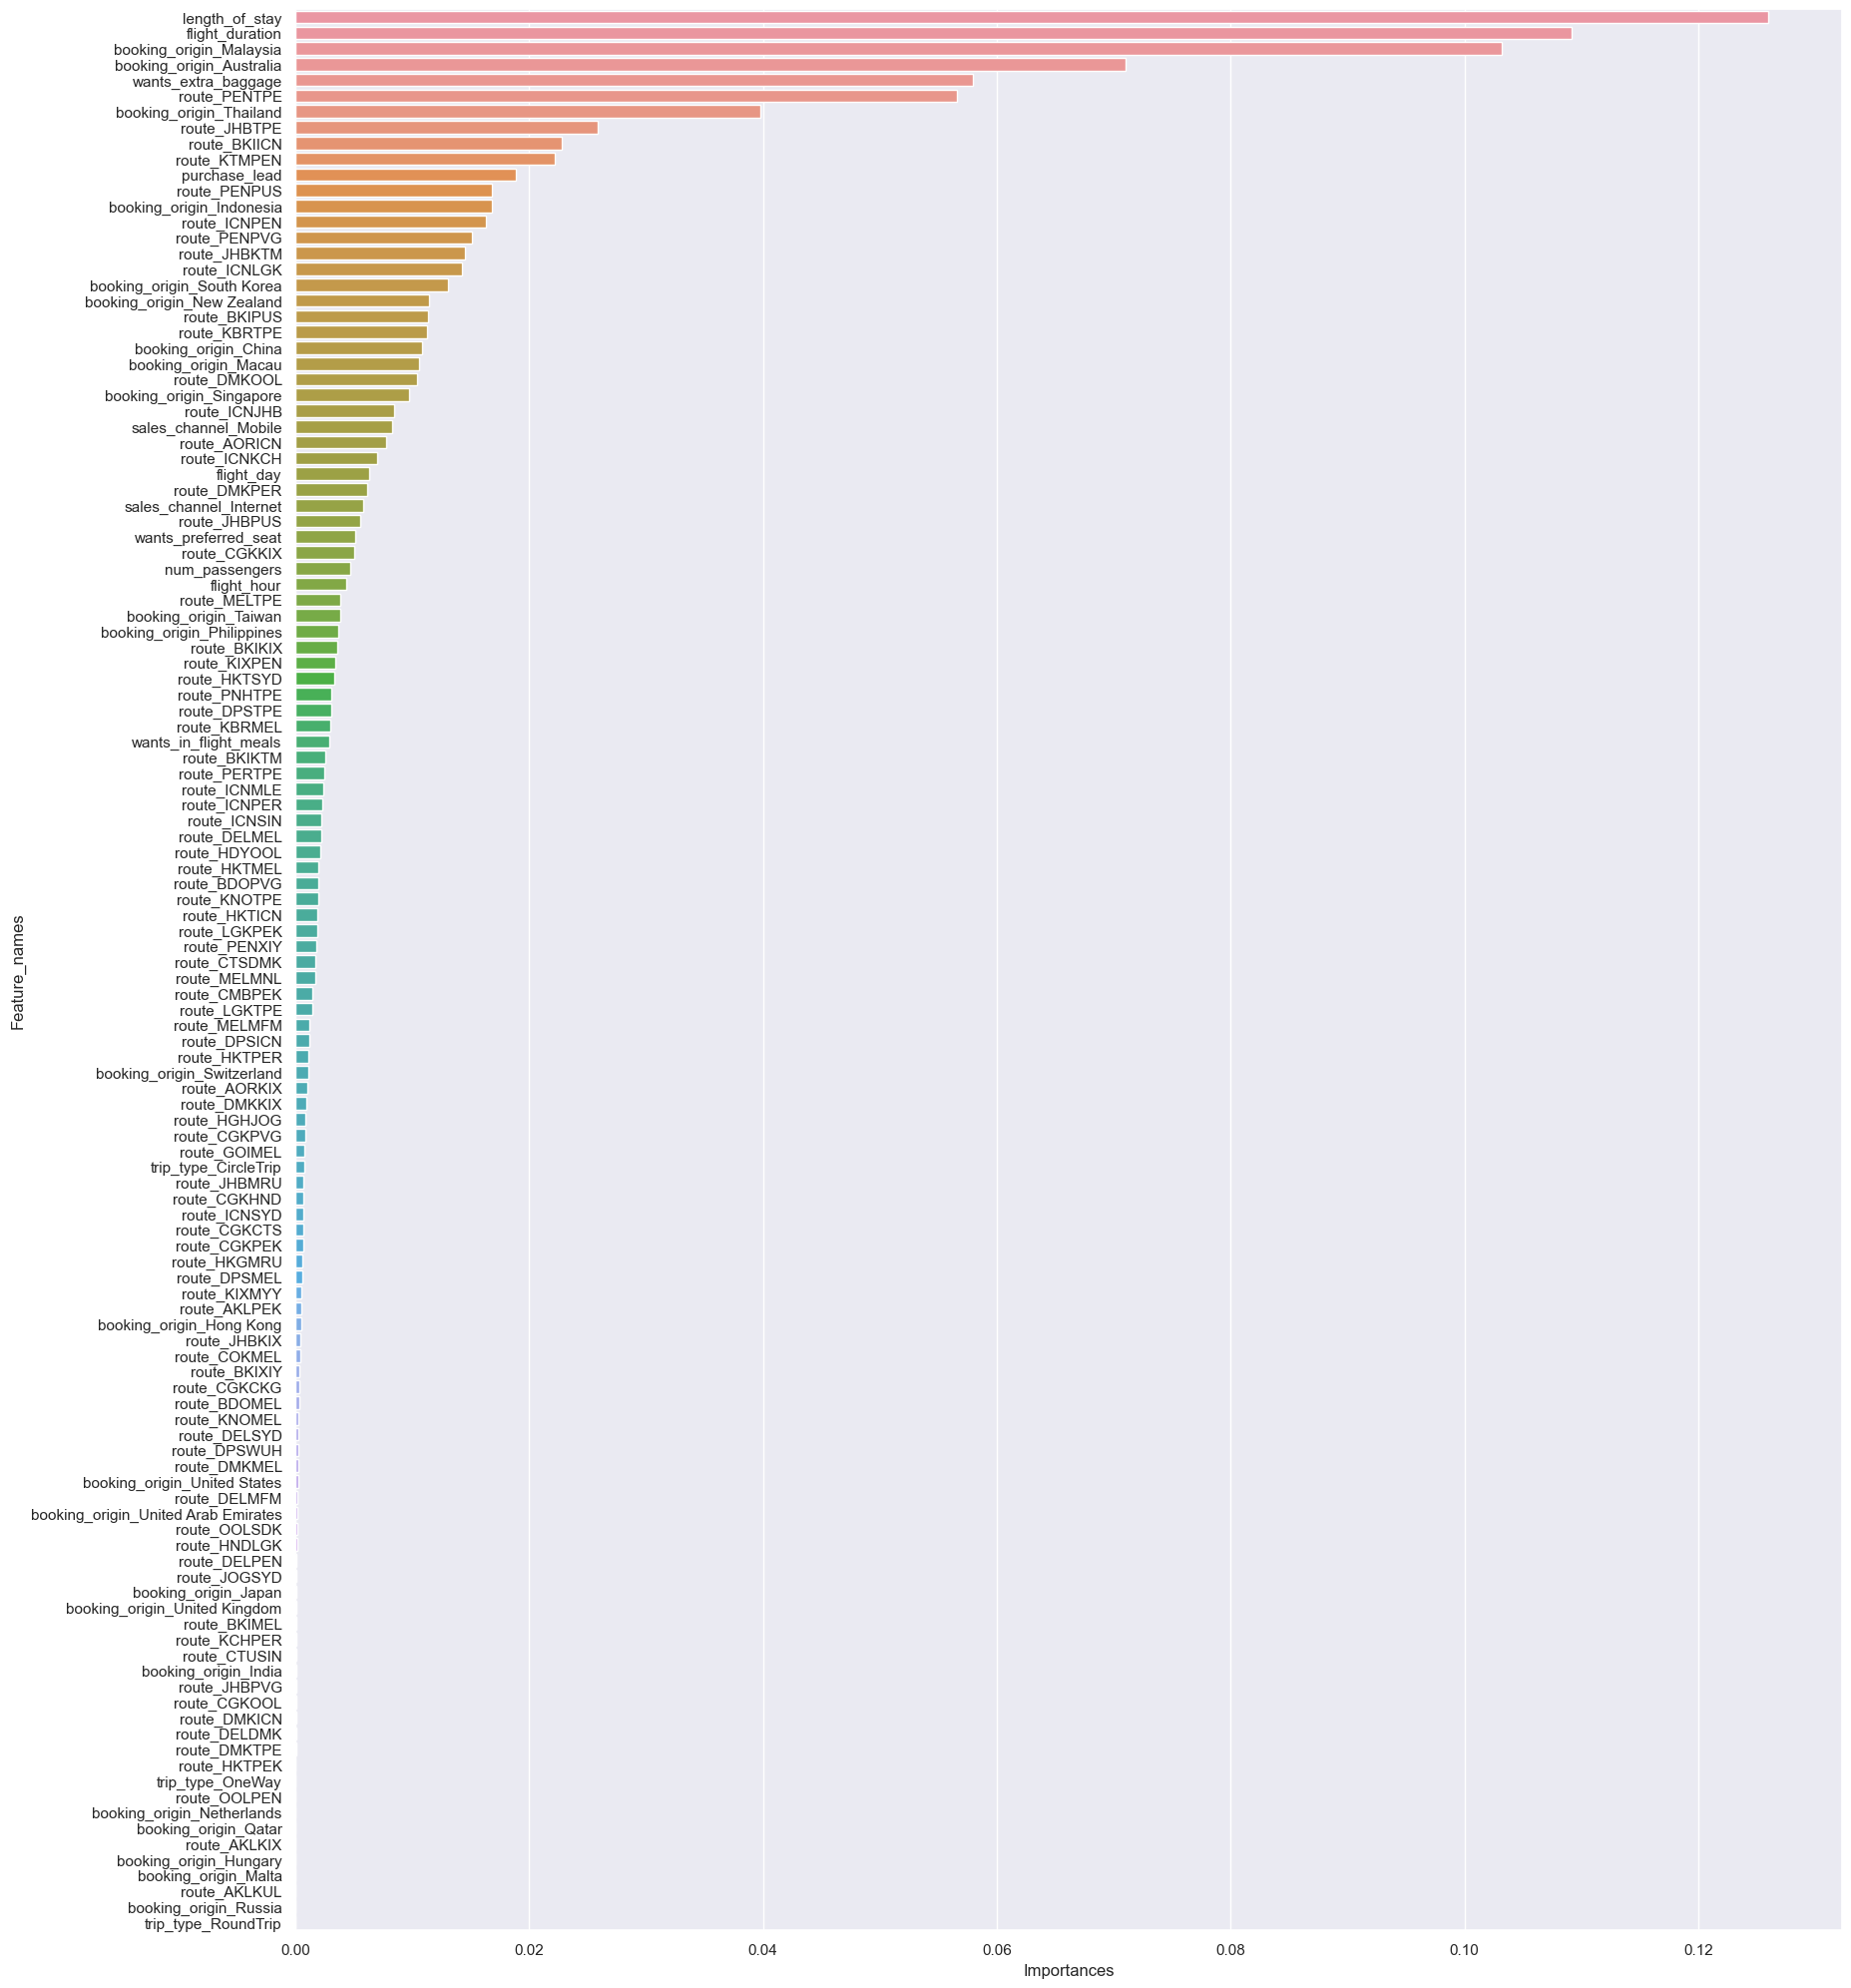

In [123]:
sns.set(rc={"figure.figsize":(20,25)})

sns.barplot(data=importances_df, 
            x= 'Importances',
             y='Feature_names',
             errorbar='sd')